In [20]:
#importing library
import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt



In [5]:
# data loading
data = pd.read_csv('titanic_dataset.csv')
data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

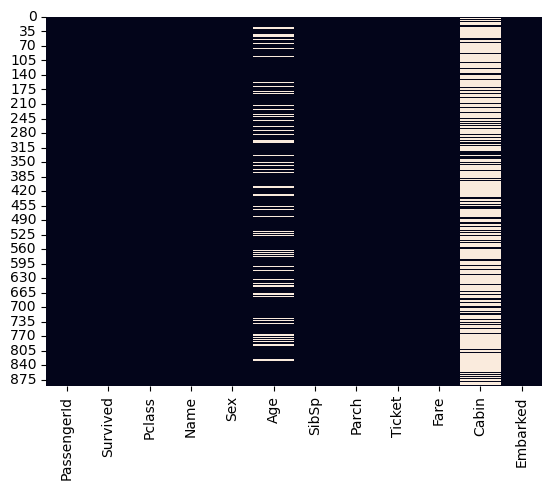

In [10]:
#now, we are checking start with a pairplot, and check for missing values
sns.heatmap(data.isnull(),cbar=False)

In [12]:
#Data Cleaning and Data Drop Process
data['Fare'] = data['Fare'].fillna(data['Fare'].dropna().median())
data['Age'] = data['Age'].fillna(data['Age'].dropna().median())


In [14]:
# Change to categoric column to numeric
data.loc[data['Sex']=='male','Sex']=0
data.loc[data['Sex']=='female','Sex']=1

# instead of nan values
data['Embarked']=data['Embarked'].fillna('S') 

In [16]:
# Change to categoric column to numeric
data.loc[data['Embarked']=='S','Embarked']=0
data.loc[data['Embarked']=='C','Embarked']=1
data.loc[data['Embarked']=='Q','Embarked']=2

In [17]:
#Drop unnecessary columns
drop_elements = ['Name','Cabin','Ticket']
data = data.drop(drop_elements, axis=1)

In [19]:
data.head(11)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0
5,6,0,3,0,28.0,0,0,8.4583,2
6,7,0,1,0,54.0,0,0,51.8625,0
7,8,0,3,0,2.0,3,1,21.0750,0
8,9,1,3,1,27.0,0,2,11.1333,0
9,10,1,2,1,14.0,1,0,30.0708,1


C:\Users\SIMBU\AppData\Local\Temp\ipykernel_23588\2335848807.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)


<Axes: >

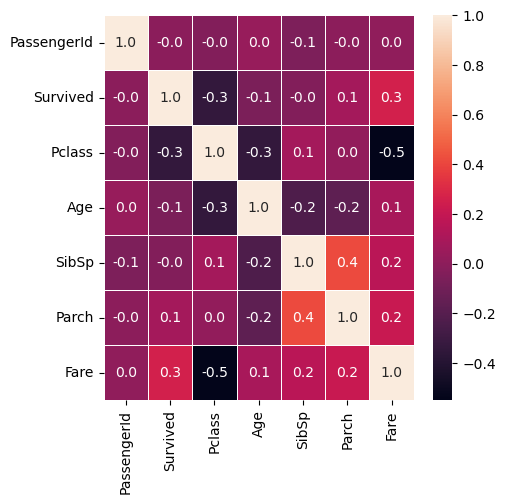

In [21]:
#heatmap for train dataset
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)


<Axes: >

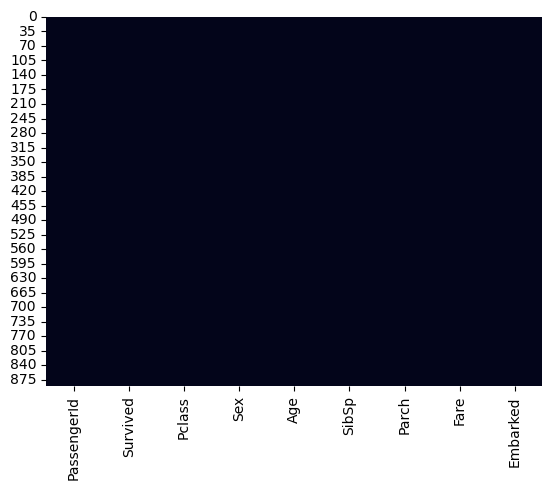

In [22]:
# Now, data is clean and read to a analyze
sns.heatmap(data.isnull(),cbar=False)

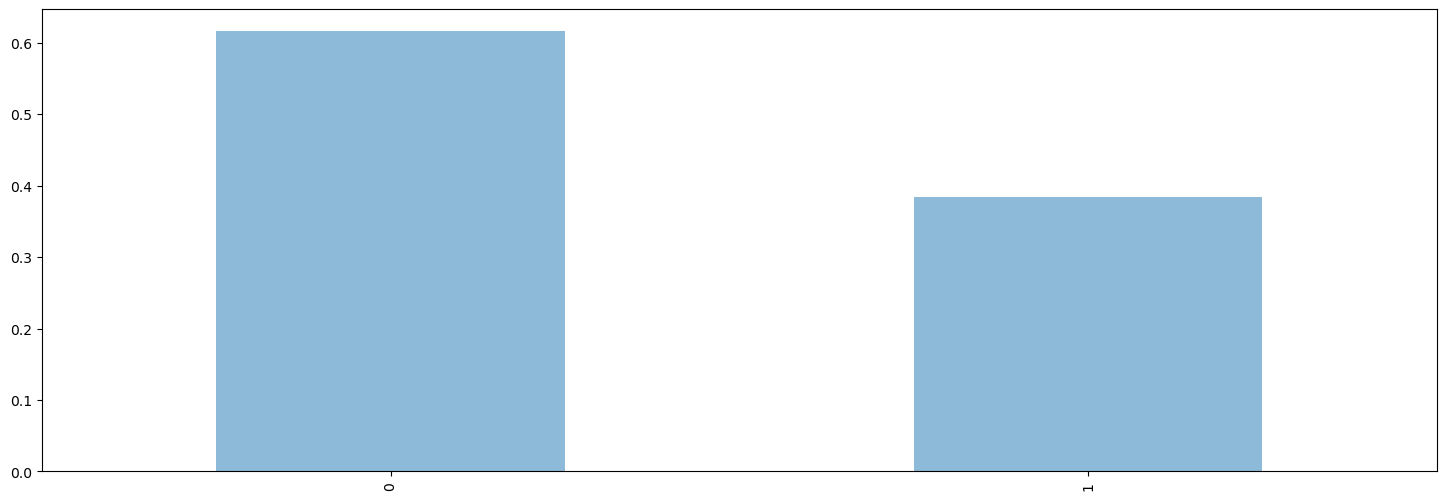

In [23]:
# how many people survived or not... %60 percent died %40 percent survived
fig = plt.figure(figsize=(18,6))
data.Survived.value_counts(normalize=True).plot(kind='bar',alpha=0.5)
plt.show()

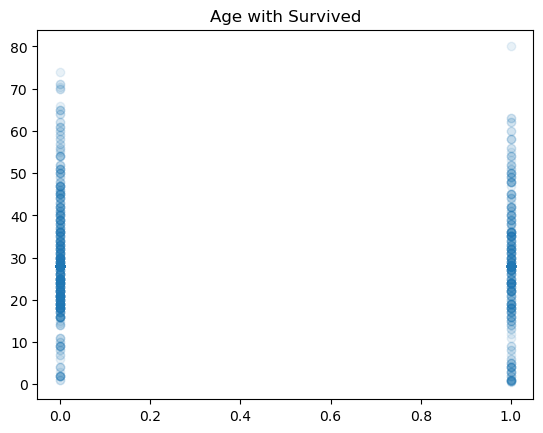

In [26]:
#Age with survived
plt.scatter(data.Survived, data.Age, alpha=0.1)
plt.title("Age with Survived")
plt.show()

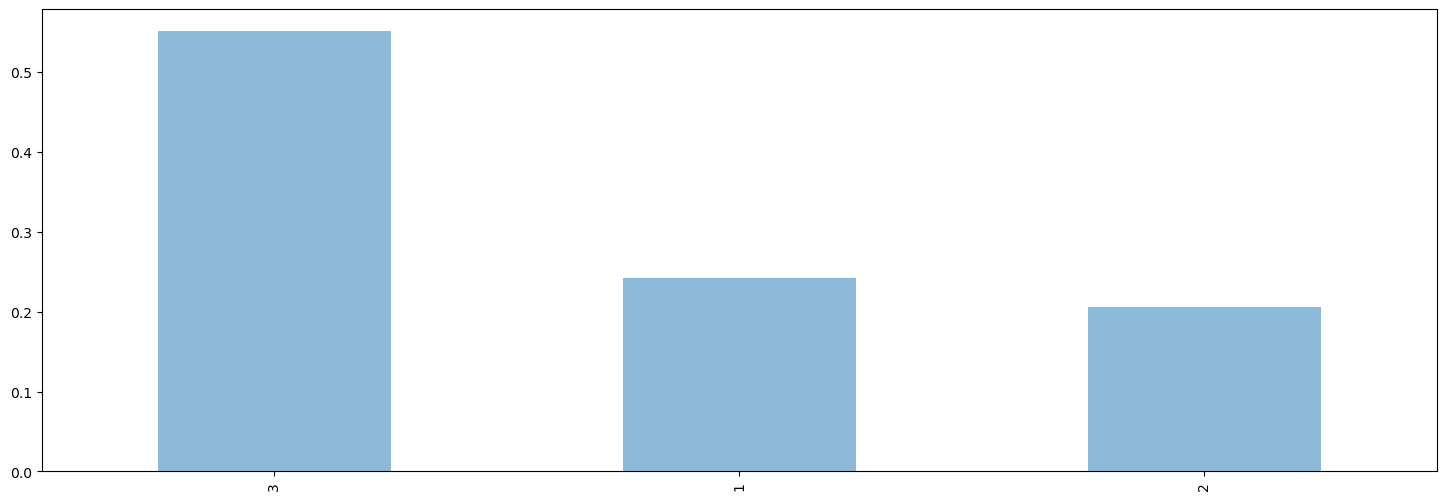

In [27]:
#Count the pessenger class
fig = plt.figure(figsize=(18,6))
data.Pclass.value_counts(normalize=True).plot(kind='bar',alpha=0.5)
plt.show()

In [28]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [32]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = data.drop("Survived",axis=1)
y = data["Survived"]

mdlsel = SelectKBest(chi2, k=5) 
mdlsel.fit(X,y)
ix = mdlsel.get_support() 
data2 = pd.DataFrame(mdlsel.transform(X), columns = X.columns.values[ix]) # en iyi leri aldi... 7 tane...
data2.head(11)

,Pclass,Sex,Age,Fare,Embarked
0,3,0,22.0,7.25,0
1,1,1,38.0,71.2833,1
2,3,1,26.0,7.925,0
3,1,1,35.0,53.1,0
4,3,0,35.0,8.05,0
5,3,0,28.0,8.4583,2
6,1,0,54.0,51.8625,0
7,3,0,2.0,21.075,0
8,3,1,27.0,11.1333,0
9,2,1,14.0,30.0708,1


In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

target = data['Survived'].values
data_features_names = ['Pclass','Sex','SibSp','Parch','Fare','Embarked','Age']
features = data[data_features_names].values

#Build test and training test
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.3,random_state=42)

my_forest = RandomForestClassifier(max_depth=5, min_samples_split=10, n_estimators=500, random_state=5,criterion = 'entropy')


my_forest_ = my_forest.fit(X_train,y_train)
target_predict=my_forest_.predict(X_test)

print("Random forest score: ",accuracy_score(y_test,target_predict))

from sklearn.metrics import mean_squared_error, r2_score
print ("MSE    :",mean_squared_error(y_test,target_predict))
print ("R2     :",r2_score(y_test,target_predict))


Random forest score:  0.8171641791044776
MSE    : 0.1828358208955224
R2     : 0.2464566477305331
